# Eksik Veri Analizi

## İçerik 
1. [Eksik Veri Nedir?](#1)
1. [Eksik Veri Türleri](#2)
1. [Eksik Verinin Rassallık Testi](#3)
1. [Eksik Veri Probleminin Çözümü](#7)
    1. [Silme Yöntemleri](#8)
    1. [Değer Atama Yöntemleri](#9)
    1. [Tahmine Dayalı Yöntemler](#10)
1. [Kaynaklar](#11)

<a id=1></a>
## Eksik Veri Nedir?

İncelenen veri setindeki gözlemlerde eksiklik olması durumudur.

Not: Eksik Verinin Direkt Olarak Silinmesinin Zararları:

1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir.
2. NA her zaman eksik veriyi ifade etmez.
3. Bilgi kaybı!
    
        Eksik değere sahip gözlemlerin veri setinden direkt çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların, modelleme çalışmalarının güvenilirliğini düşürecektir. (Alpar, 2011)
    
        Eksik gözlemlerin veri setinden direkt çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal olarak oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olabilecektir.(Tabachnick ve Fidell, 1996)


<a id=2></a>
## Eksik Veri Türleri

1. Tümüyle Raslantısal Kayıp: Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemler.
2. Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.
3. Raslantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/Melbourne_housing_FULL.csv")

In [3]:
# Eksik değerlerin gözlemlenmesi
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
# Eksik olmayan değerlerin gözlemlenmesi
df.notnull().sum()

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

In [5]:
# Tüm eksik değerlerin sayısı
df.isnull().sum().sum()

100975

In [6]:
# En az bir sütununda eksik değer bulanan satırlar
df[df.isnull().any(axis = 1)].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0


In [7]:
# tüm sütunlarında eksik değer bulanan satırlar
df[df.isnull().all(axis = 1)].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [8]:
# eksik değere sahip olmayan satırlar
df[df.notnull().all(axis = 1)].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


### Eksik Değerler Problemine Basit Çözümler

#### Silme

In [9]:
df.dropna() # inplace = True argümanı ile veri setinde değişiklik kalıcı hale getirilebilir

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


#### Ortalama ile doldurma

In [10]:
# Tek sütun için 
df["Price"].fillna(df.Price.mean())

0        1.050173e+06
1        1.480000e+06
2        1.035000e+06
3        1.050173e+06
4        1.465000e+06
             ...     
34852    1.480000e+06
34853    8.880000e+05
34854    7.050000e+05
34855    1.140000e+06
34856    1.020000e+06
Name: Price, Length: 34857, dtype: float64

In [11]:
# tüm sütunaları ortalama ile doldurma
df_ = df.select_dtypes(["int64", "float64"])
df_.apply(lambda x: x.fillna(x.mean()), axis=0)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1.050173e+06,2.5,3067.0,2.000000,1.000000,1.000000,126.000000,160.2564,1965.289885,-37.801400,144.995800,4019.0
1,2,1.480000e+06,2.5,3067.0,2.000000,1.000000,1.000000,202.000000,160.2564,1965.289885,-37.799600,144.998400,4019.0
2,2,1.035000e+06,2.5,3067.0,2.000000,1.000000,0.000000,156.000000,79.0000,1900.000000,-37.807900,144.993400,4019.0
3,3,1.050173e+06,2.5,3067.0,3.000000,2.000000,1.000000,0.000000,160.2564,1965.289885,-37.811400,145.011600,4019.0
4,3,1.465000e+06,2.5,3067.0,3.000000,2.000000,0.000000,134.000000,150.0000,1900.000000,-37.809300,144.994400,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1.480000e+06,6.3,3013.0,4.000000,1.000000,3.000000,593.000000,160.2564,1965.289885,-37.810530,144.884670,6543.0
34853,2,8.880000e+05,6.3,3013.0,2.000000,2.000000,1.000000,98.000000,104.0000,2018.000000,-37.815510,144.888260,6543.0
34854,2,7.050000e+05,6.3,3013.0,2.000000,1.000000,2.000000,220.000000,120.0000,2000.000000,-37.822860,144.878560,6543.0
34855,3,1.140000e+06,6.3,3013.0,3.084647,1.624798,1.728845,593.598993,160.2564,1965.289885,-37.810634,145.001851,6543.0


<a id=3></a>
## Eksik Verinin Rassallık Testi

1. Görsel Teknikler
1. Bağımsız iki örneklem t testi
1. Korelasyon testi
1. Little'nin MCAR testi

<a id=12></a>
### Görsel Teknikler

In [12]:
import missingno as msno

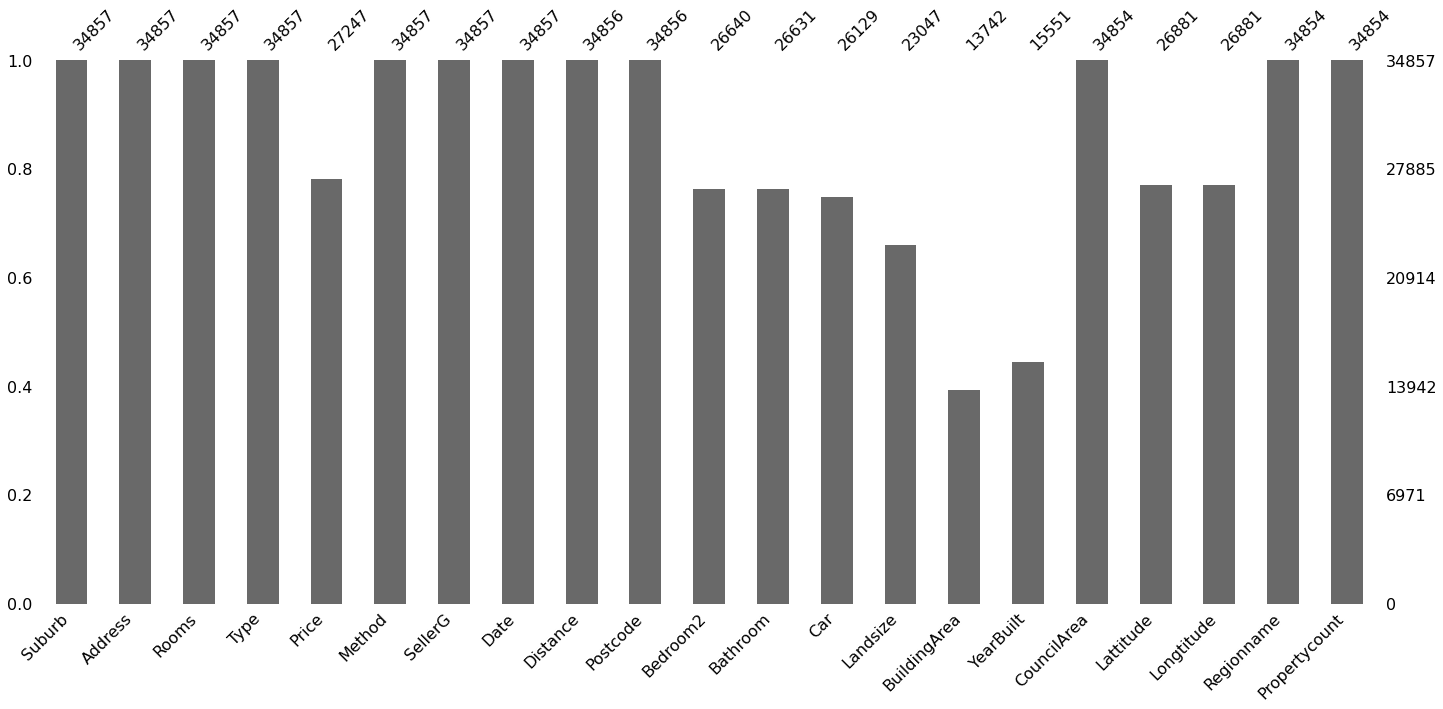

In [13]:
msno.bar(df);

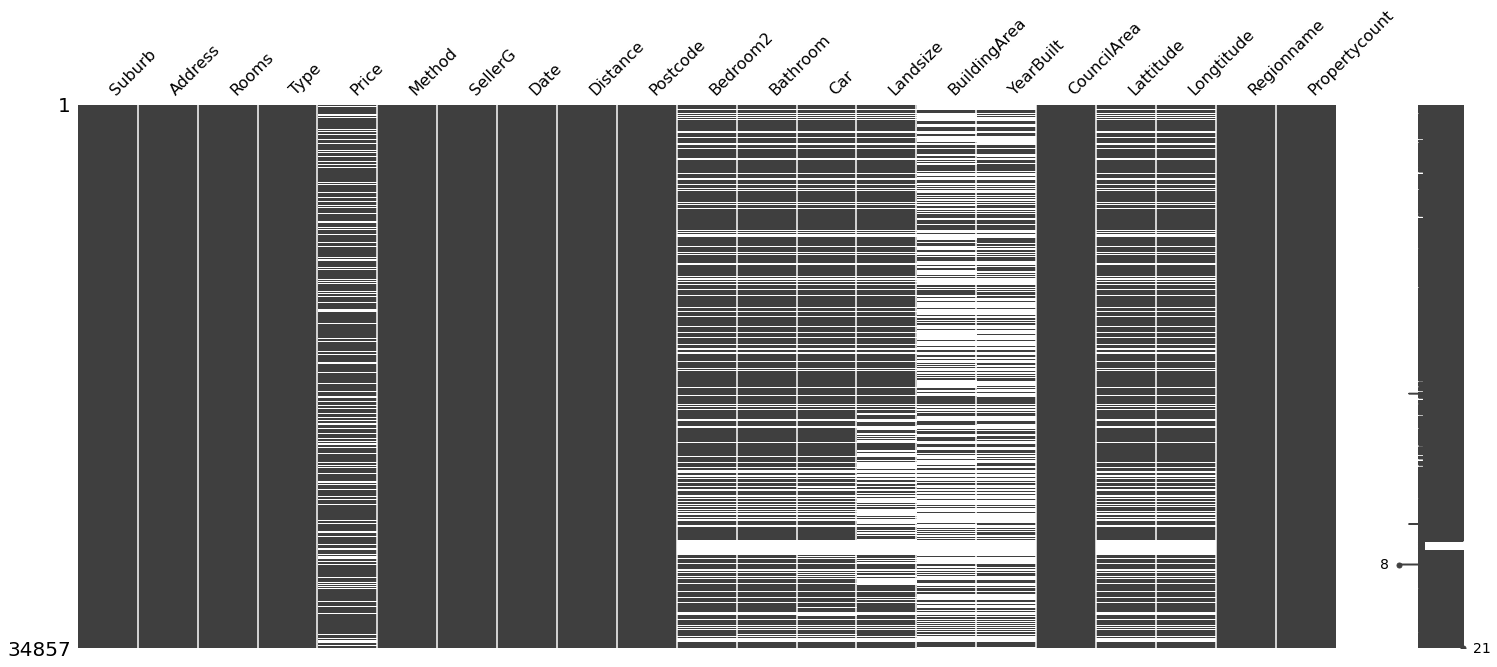

In [14]:
msno.matrix(df);

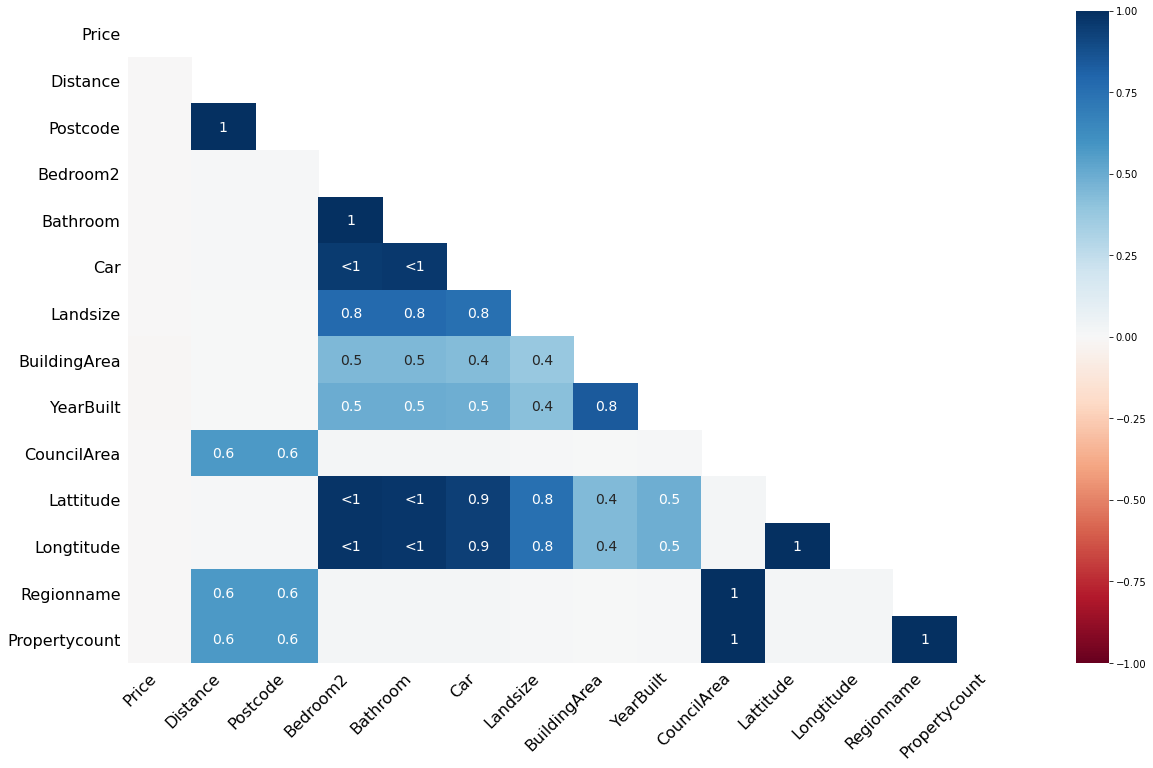

In [15]:
msno.heatmap(df);

<a id=7></a>
## Eksik Veri Probleminin Çözümü

<a id=8></a>
### Silme Yöntemleri

* Gözlem veya Değişken Silme Yöntemi
* Liste Bazında Silme Yöntemi (Listwise Method)
* Çiftler Bazında Silme Yöntemi (Pairwise Method)

In [16]:
df.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [17]:
df.dropna(how="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [18]:
df.dropna(axis=1)

,Suburb,Address,Rooms,Type,Method,SellerG,Date
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017
...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,PI,Jas,24/02/2018
34853,Yarraville,29A Murray St,2,h,SP,Sweeney,24/02/2018
34854,Yarraville,147A Severn St,2,t,S,Jas,24/02/2018
34855,Yarraville,12/37 Stephen St,3,h,SP,hockingstuart,24/02/2018


In [19]:
df.dropna(axis=1, how="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


<a id=9></a>
### Değer Atama Yöntemleri

* Mean, Medyan, Mod 
* En Benzer Değeri Atama (Hot Deck)
* Dış Kaynaklı Değer Atama

In [20]:
# Sayısal değişkenlerde değer atama
df.fillna(0)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,0.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,0.0,0.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,0.0,0.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,0.0,0.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,0.0,0.0,0.0,0.0,0.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0


In [21]:
df["Distance"].fillna(df.Distance.mean)

0        2.5
1        2.5
2        2.5
3        2.5
4        2.5
        ... 
34852    6.3
34853    6.3
34854    6.3
34855    6.3
34856    6.3
Name: Distance, Length: 34857, dtype: object

In [22]:
df.fillna(df.mean()[:])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.000000,1.000000,126.000000,160.2564,1965.289885,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.000000,1.000000,202.000000,160.2564,1965.289885,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.000000,0.000000,156.000000,79.0000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.000000,1.000000,0.000000,160.2564,1965.289885,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.000000,0.000000,134.000000,150.0000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1.480000e+06,PI,Jas,24/02/2018,6.3,3013.0,...,1.000000,3.000000,593.000000,160.2564,1965.289885,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.000000,1.000000,98.000000,104.0000,2018.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,...,1.000000,2.000000,220.000000,120.0000,2000.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.624798,1.728845,593.598993,160.2564,1965.289885,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,6543.0


In [23]:
df.fillna(df.median()["Price":"Distance"])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [24]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.000000,1.000000,126.000000,160.2564,1965.289885,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.000000,1.000000,202.000000,160.2564,1965.289885,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.000000,0.000000,156.000000,79.0000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.000000,1.000000,0.000000,160.2564,1965.289885,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.000000,0.000000,134.000000,150.0000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1.480000e+06,PI,Jas,24/02/2018,6.3,3013.0,...,1.000000,3.000000,593.000000,160.2564,1965.289885,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.000000,1.000000,98.000000,104.0000,2018.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,...,1.000000,2.000000,220.000000,120.0000,2000.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.624798,1.728845,593.598993,160.2564,1965.289885,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,6543.0


In [25]:
# Kategorik değişken kırılımında değer atama 
df.groupby("SellerG")["Price"].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000135806609D0>>

In [26]:
df["Price"].fillna(df.groupby("SellerG")["Price"].transform("mean"))

0        1.350790e+06
1        1.480000e+06
2        1.035000e+06
3        9.060000e+05
4        1.465000e+06
             ...     
34852    1.480000e+06
34853    8.880000e+05
34854    7.050000e+05
34855    1.140000e+06
34856    1.020000e+06
Name: Price, Length: 34857, dtype: float64

In [27]:
# Kategorik Değişkenler İçin Değer Atama
df_ = df.select_dtypes(["object"])
df_.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

In [28]:
df["CouncilArea"].fillna(df["CouncilArea"].mode()[0])

0              Yarra City Council
1              Yarra City Council
2              Yarra City Council
3              Yarra City Council
4              Yarra City Council
                   ...           
34852    Maribyrnong City Council
34853    Maribyrnong City Council
34854    Maribyrnong City Council
34855    Maribyrnong City Council
34856    Maribyrnong City Council
Name: CouncilArea, Length: 34857, dtype: object

In [29]:
# Sonrasındaki değer ile doldurur
df["CouncilArea"].fillna(method= "bfill")

0              Yarra City Council
1              Yarra City Council
2              Yarra City Council
3              Yarra City Council
4              Yarra City Council
                   ...           
34852    Maribyrnong City Council
34853    Maribyrnong City Council
34854    Maribyrnong City Council
34855    Maribyrnong City Council
34856    Maribyrnong City Council
Name: CouncilArea, Length: 34857, dtype: object

In [30]:
# Öncesindeki değer ile doldurur
df["CouncilArea"].fillna(method= "ffill")

0              Yarra City Council
1              Yarra City Council
2              Yarra City Council
3              Yarra City Council
4              Yarra City Council
                   ...           
34852    Maribyrnong City Council
34853    Maribyrnong City Council
34854    Maribyrnong City Council
34855    Maribyrnong City Council
34856    Maribyrnong City Council
Name: CouncilArea, Length: 34857, dtype: object

<a id=10></a>
### Tahmine Dayalı Yöntemler

#### Makine Öğrenmesi

In [31]:
df_ = df.select_dtypes(["float64"])
df_ = df_.loc[:1000]
df_.head(2)

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0


In [32]:
# KNN
from ycimpute.imputer import knnimput

In [33]:
var_names = list(df_)

In [34]:
n_df = np.array(df_)

In [35]:
imputer = knnimput.KNN(k=1000).complete(n_df)

Imputing row 1/1001 with 3 missing, elapsed time: 0.183
Imputing row 101/1001 with 0 missing, elapsed time: 0.191
Imputing row 201/1001 with 8 missing, elapsed time: 0.199
Imputing row 301/1001 with 8 missing, elapsed time: 0.205
Imputing row 401/1001 with 0 missing, elapsed time: 0.218
Imputing row 501/1001 with 0 missing, elapsed time: 0.224
Imputing row 601/1001 with 2 missing, elapsed time: 0.230
Imputing row 701/1001 with 1 missing, elapsed time: 0.238
Imputing row 801/1001 with 1 missing, elapsed time: 0.247
Imputing row 901/1001 with 0 missing, elapsed time: 0.253
Imputing row 1001/1001 with 9 missing, elapsed time: 0.264


In [36]:
imputer = pd.DataFrame(imputer, columns = var_names)

In [37]:
imputer.isnull().sum()

Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [38]:
# EM Algoritması
from ycimpute.imputer import EM

In [39]:
imputer = EM().complete(n_df)

In [40]:
imputer = pd.DataFrame(imputer, columns = var_names)

In [41]:
imputer.isnull().sum()

Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

<a id=11></a>
## Kaynaklar

#### Kurslar

- https://www.udemy.com/course/python-egitimi/
